In [1]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import os
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
from tkinter import *
from PIL import Image,ImageTk

import warnings
warnings.filterwarnings('ignore')

D:\Users\iamog\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
movies='movies.csv'
ratings="ratings.csv"
df_movies=pd.read_csv(movies, usecols=['movieId','title'],dtype={'movieId':'int32','title':'str'})
df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [4]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [10]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
import seaborn as sns

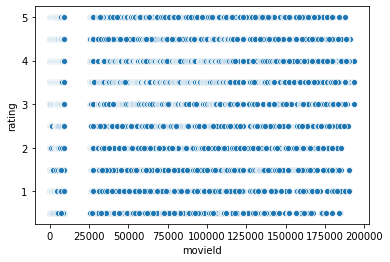

In [13]:
sns.scatterplot(x=df_ratings.movieId,y=df_ratings.rating)

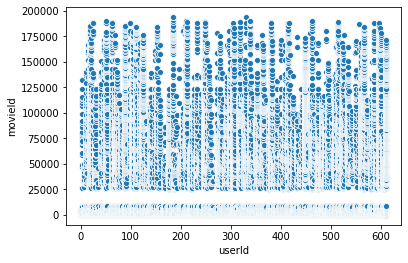

In [23]:
sns.scatterplot(x=df_ratings.userId,y=df_ratings.movieId)

In [16]:
#Sparse Matrix
movies_users=df_ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)
movies_users
mat_movies_users=csr_matrix(movies_users.values)


In [17]:
#Euclidean distance
#Manhattan Distance
#Cosine similarity
model_knn=NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=20)

In [18]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [19]:
print(df_movies['title'][1])

Jumanji (1995)


In [20]:
#Recommender(movie_name)=> List of movies recommended
def recommender(movie_name,data,model,n_recommendations):
    model.fit(data)
    idx=process.extractOne(movie_name,df_movies['title'])[2]
    print('Movie Selected : ',df_movies['title'][idx], 'Index: ',idx)
    print('Searching For Recommendation.......')
    distances,indices=model.kneighbors(data[idx],n_neighbors=n_recommendations)
    for i in indices:
        rec=df_movies['title'][i].where(i!=idx).values
        
    
    return rec


In [21]:
print(recommender('mumma bhai mbbs',mat_movies_users,model_knn,5))          

Movie Selected :  Munna bhai M.B.B.S. (2003) Index:  9519
Searching For Recommendation.......
['Rough Night (2017)' 'Okja (2017)' 'Mommy (2014)'
 'Mystère à la Tour Eiffel (2015)'
 'The Unauthorized Saved by the Bell Story (2014)']


In [22]:
class Gui:
    def __init__(s):
        s.loginpage()
    def loginpage(s):
        try:
            s.scr.destroy()
        except:
            pass
        
        s.scr=Tk()
        s.scr.geometry('1000x500+0+0')
        
        l=Label(s.scr,bg='grey',fg='white',font=('times',15,'bold'),text='MOVIE RECOMENDATION SYSTEM')
        l.pack(side=TOP,fill=X)
        
        load=Image.open("movie-and-popcorn.jpg")
        render=ImageTk.PhotoImage(load)
        
        img=Label(image=render)
        img.pack(fill=BOTH)
        
        s.l1=Label(s.scr,bg='grey',fg='white',font=('times',20,'bold'),text='Enter Movie Name')#Movie name entry
        s.l1.pack()
        s.l1.place(x=150,y=100)
        
        
        s.user=Text(s.scr,bg='grey',fg='white',height=1,font=('times',20,'bold'),width=30)#Movie name entry
        s.user.pack()
        s.user.place(x=450,y=100)
        
        
        #b=Button(s.scr,text='Predict',bg='black',fg='white',font=('times',15,'bold'))# Predict Movies
        #b.place(x=350,y=370)
        
        s.b=Button(s.scr,text='Show Movies',command=s.predict,bg='grey',fg='white',font=('times',15,'bold'),width=30)# Show movies
        s.b.place(x=300,y=420)
        
        
        
        s.scr.title("Movie Recomendation System")
        s.scr.mainloop()
    def predict(s):
        
        ip=s.user.get("1.0","end-1c")
        if ip is '':
            
            a=Label(s.scr,bg='grey',fg='white',font=('times',30,'bold'))
            a.place(x=320,y=150)
            a.config(text="Name a movie") 
        
        else :
            
            recc=recommender(ip,mat_movies_users,model_knn,5)
            
            a=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            a.place(x=320,y=150)
            a.config(text=recc[0])
            
            b=Label(s.scr,bg='grey',fg='white',font=('times',10,))
            b.place(x=320,y=170)
            b.config(text=recc[1])
            
            c=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            c.place(x=320,y=190)
            c.config(text=recc[2])
            
            d=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            d.place(x=320,y=210)
            d.config(text=recc[3])
            
            e=Label(s.scr,bg='grey',fg='white',font=('times',10,'bold'))
            e.place(x=320,y=230)
            e.config(text=recc[4])

Gui()